In [2]:
!pip install statsmodels 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
plt.rcParams["figure.figsize"] = (12,6)

In [4]:
df = pd.read_csv("Course Data/macrodata.csv", index_col=0, parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<Axes: >

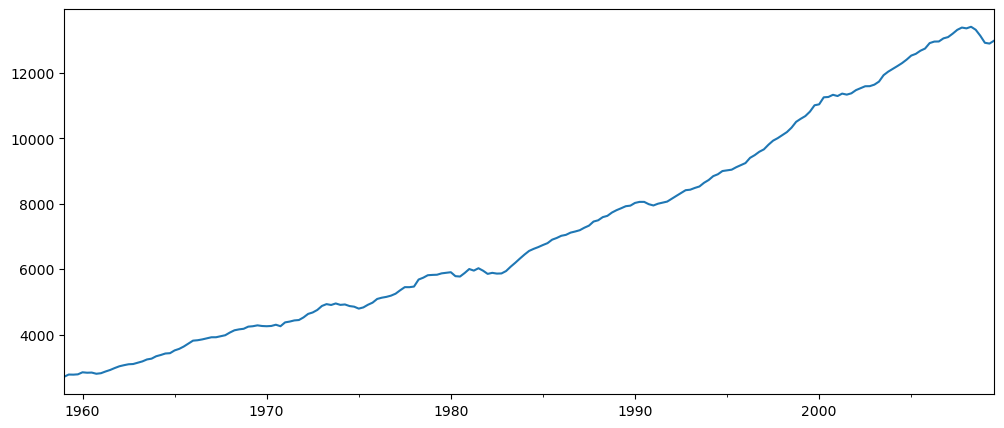

In [21]:
df["realgdp"].plot(figsize=(12,5))

In [22]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [26]:
gdp_cycle, gdp_trend = hpfilter(df["realgdp"], lamb=1600)
df["trend"] = gdp_trend; df["cycle"] = gdp_cycle

<Axes: >

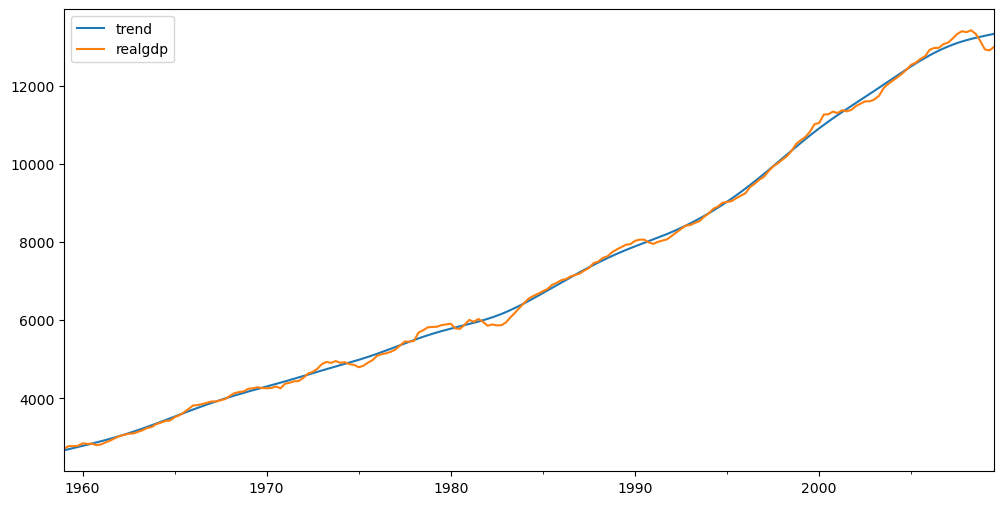

In [28]:
df[["trend", "realgdp"]].plot()

In [32]:
airline = pd.read_csv("Course Data/airline_passengers.csv", index_col="Month", parse_dates=True)
airline = airline.dropna()
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

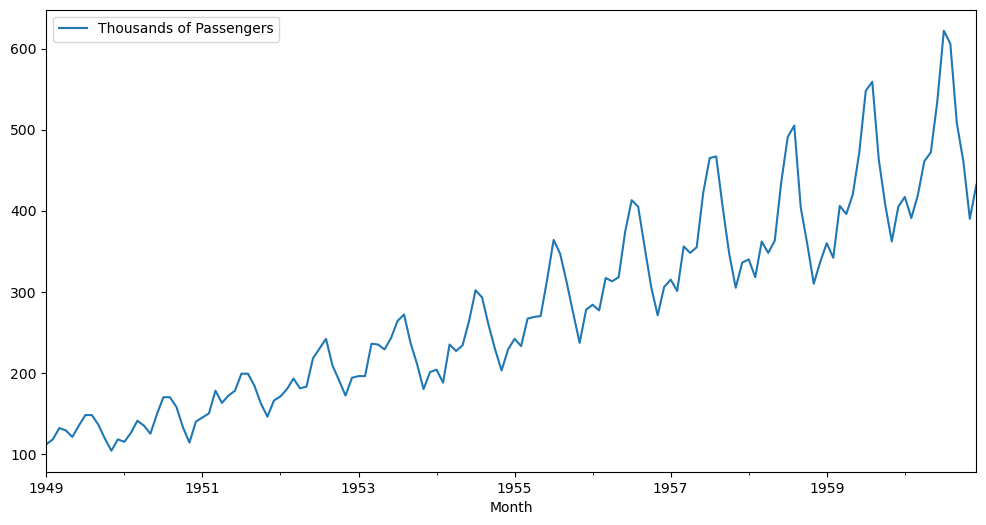

In [33]:
airline.plot()

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
result = seasonal_decompose(airline["Thousands of Passengers"], model="multiplicative")

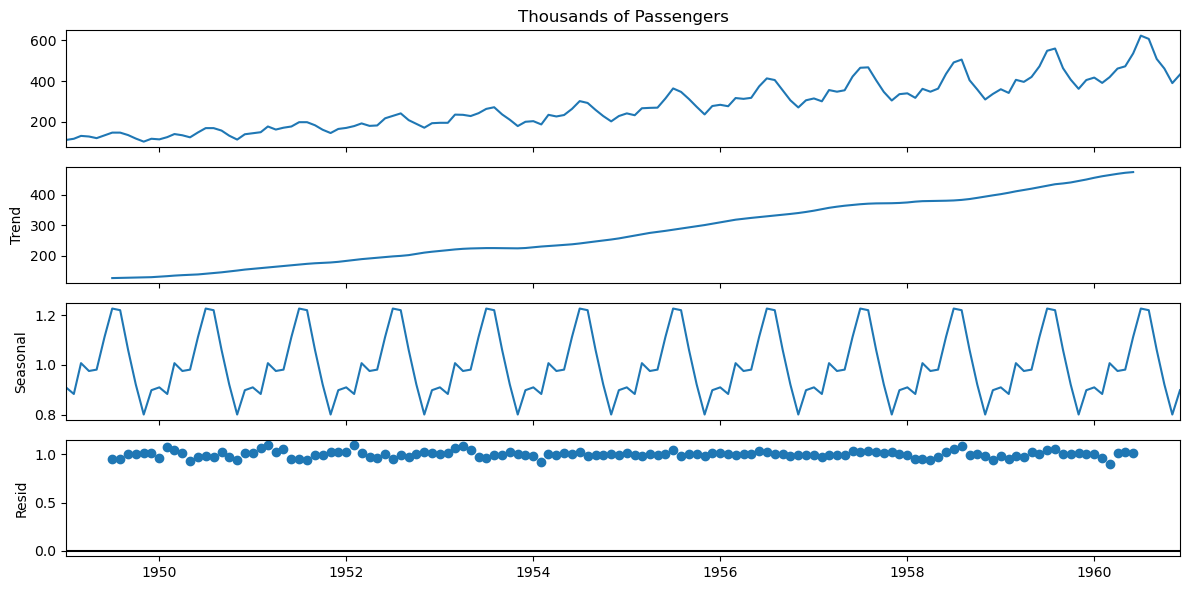

In [43]:
result.plot();

## EWMA

In [45]:
airline["6m-sma"] = airline["Thousands of Passengers"].rolling(window=6).mean() 
airline["12m-sma"] = airline["Thousands of Passengers"].rolling(window=12).mean() 

<Axes: xlabel='Month'>

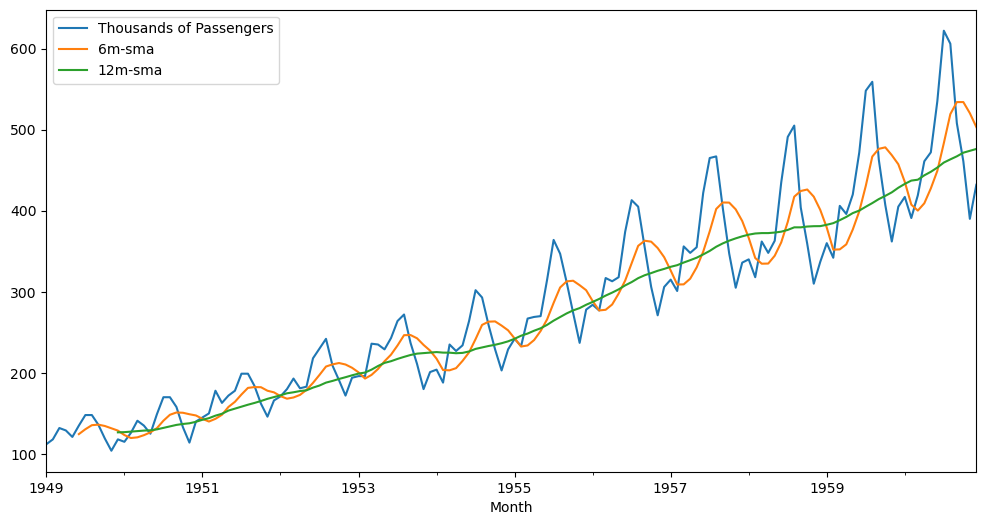

In [46]:
airline.plot()

In [47]:
airline["ewma-12"] = airline["Thousands of Passengers"].ewm(span=12).mean()

<Axes: xlabel='Month'>

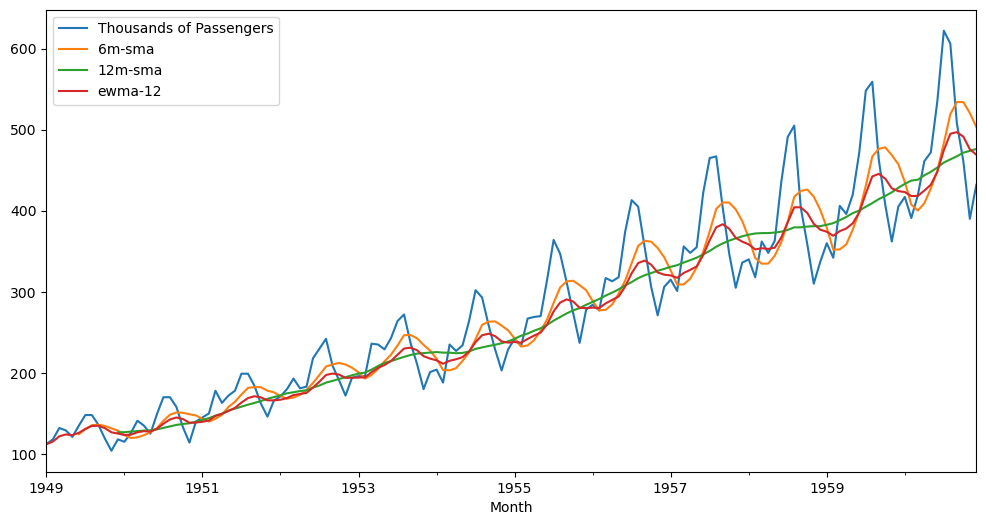

In [50]:
airline.plot()

## Holt-Winters Method

In [51]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [54]:
airline.index.freq = "MS"
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [57]:
span = 12
alpha = 2/(span + 1)

In [66]:
airline["EWMA12"] = airline["Thousands of Passengers"].ewm(alpha=alpha, adjust=False).mean()

In [67]:
model = SimpleExpSmoothing(airline["Thousands of Passengers"])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [68]:
airline["SES12"] = fitted_model.fittedvalues.shift(-1)

In [69]:
airline

,Thousands of Passengers,6m-sma,12m-sma,ewma-12,EWMA12,SES12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861
...,...,...,...,...,...,...
1960-08-01,606,519.166667,463.333333,494.898620,494.898619,494.898619
1960-09-01,508,534.000000,467.083333,496.914217,496.914216,496.914216
1960-10-01,461,534.000000,471.583333,491.388952,491.388952,491.388952


In [70]:
# Holt Method

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [72]:
airline["DES_add_12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="add").fit().fittedvalues.shift(-1)

<Axes: xlabel='Month'>

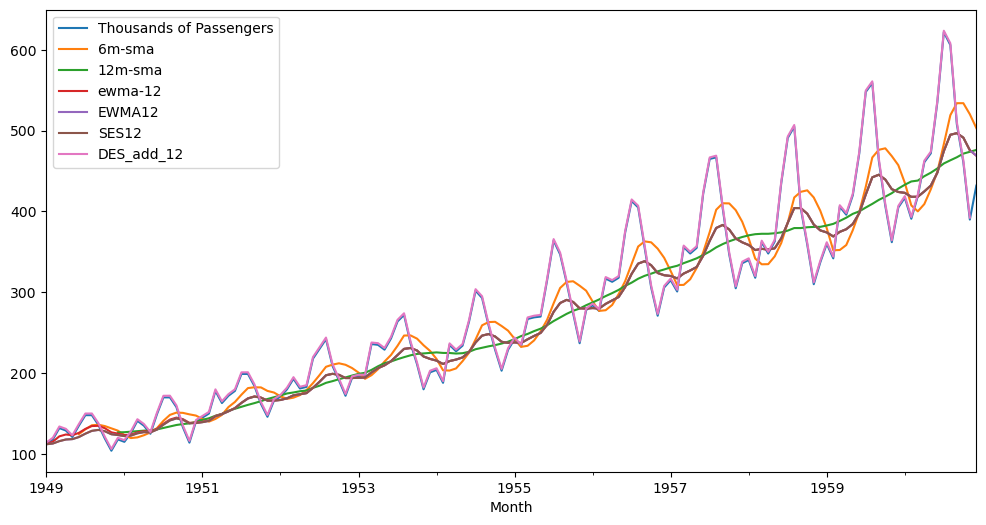

In [73]:
airline.plot()

In [74]:
# Holt - Winters Method

In [80]:
airline["TES_mul_12"] = ExponentialSmoothing(
    airline["Thousands of Passengers"], 
    trend    = "mul", 
    seasonal = "mul",
    seasonal_periods = 12).fit().fittedvalues # Do not shift

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

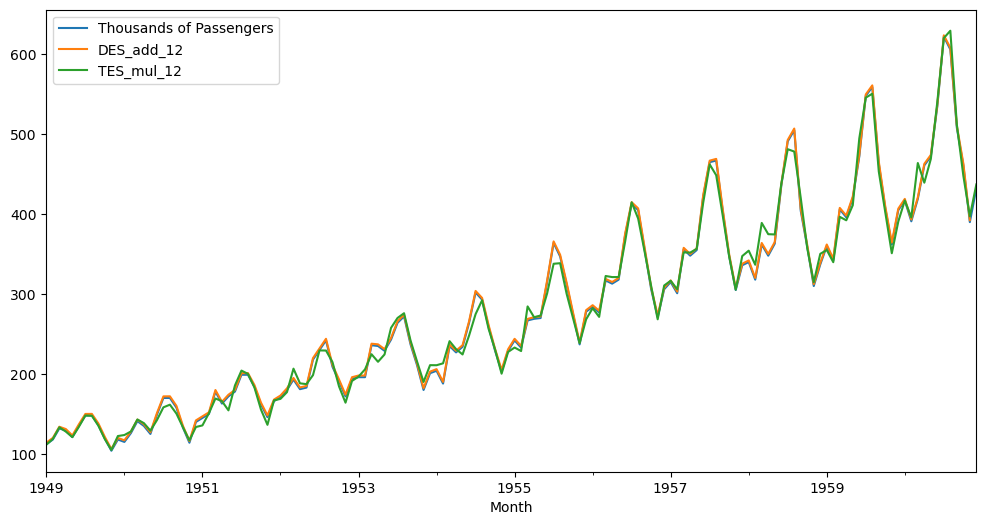

In [84]:
airline[["Thousands of Passengers", "DES_add_12", "TES_mul_12"]].plot()

## Forecast

In [96]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    int64  
 1   6m-sma                   139 non-null    float64
 2   12m-sma                  133 non-null    float64
 3   ewma-12                  144 non-null    float64
 4   EWMA12                   144 non-null    float64
 5   SES12                    143 non-null    float64
 6   DES_add_12               143 non-null    float64
 7   TES_mul_12               144 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 10.1 KB


In [85]:
train_data = airline.iloc[:109]
test_data  = airline.iloc[108:]

In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [108]:
fitted_model = ExponentialSmoothing(
    train_data["Thousands of Passengers"],
    trend="mul",
    seasonal="mul",
    seasonal_periods=12).fit()

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [109]:
test_predictions = fitted_model.forecast(36)

<Axes: xlabel='Month'>

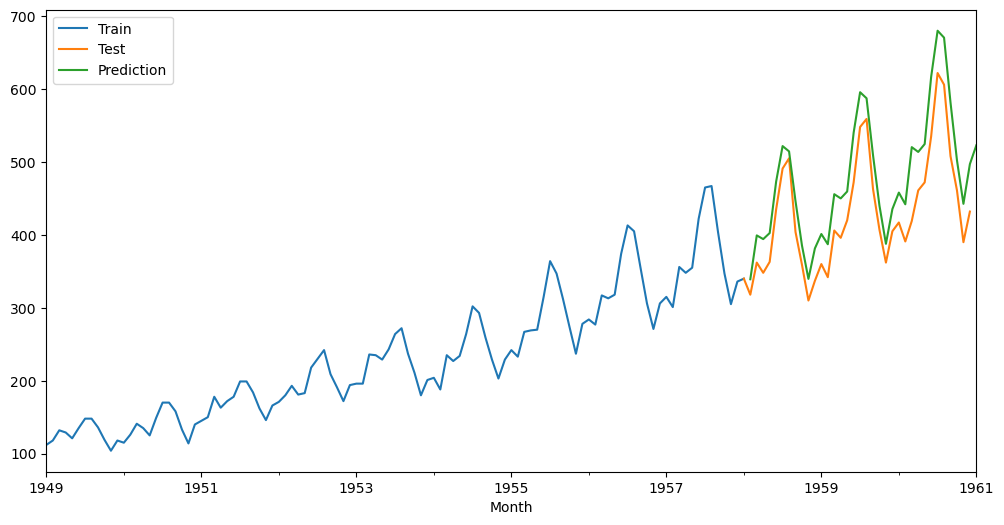

In [110]:
train_data["Thousands of Passengers"].plot(legend="True", label="Train")
test_data["Thousands of Passengers"].plot(legend="True", label="Test")
test_predictions.plot(legend="True", label="Prediction")

In [116]:
rmse = np.sqrt(np.power((test_data["Thousands of Passengers"] - test_predictions), 2))
(rmse / test_data["Thousands of Passengers"]).mean()

0.1075508021701728

# General Forecasting Techniques

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [122]:
mean_squared_error(test_data["Thousands of Passengers"], test_predictions)

74.92820898138402

In [128]:
test_data["Thousands of Passengers"].std()

79.32915155045013

In [129]:
final_model = ExponentialSmoothing(airline["Thousands of Passengers"],
                                   trend="mul",
                                   seasonal="mul",
                                   seasonal_periods=12).fit()

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [135]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Month'>

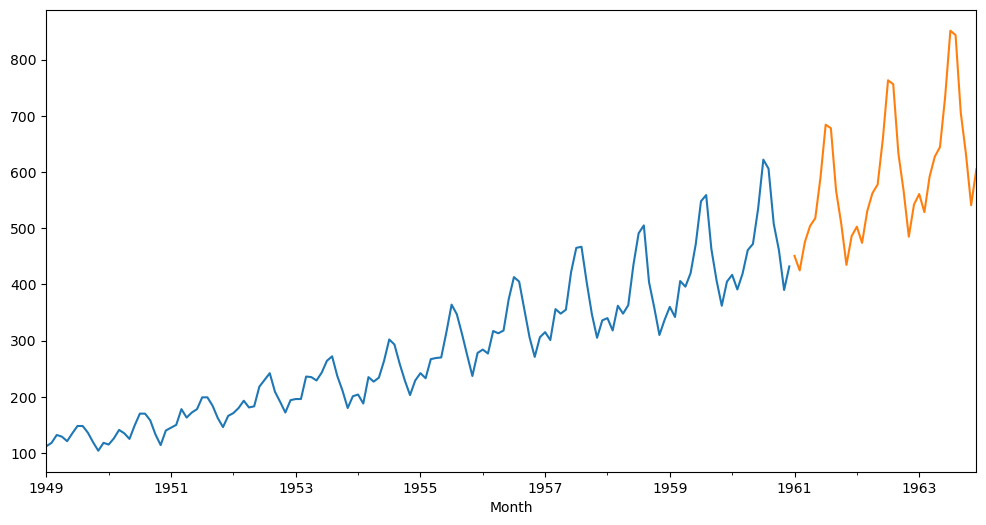

In [136]:
airline["Thousands of Passengers"].plot()
forecast_predictions.plot()

In [137]:
from statsmodels.tsa.statespace.tools import diff

In [139]:
diff(airline["Thousands of Passengers"], k_diff=1)

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Freq: MS, Name: Thousands of Passengers, Length: 143, dtype: float64

## ACF and PACF

In [140]:
import statsmodels.api as sm

In [141]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [142]:
# Non stationary
airline

,Thousands of Passengers,6m-sma,12m-sma,ewma-12,EWMA12,SES12,DES_add_12,TES_mul_12
Month,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000,114.102394,111.595648
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077,120.040657,118.842606
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988,134.001539,133.333853
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836,131.085845,127.899963
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861,123.110263,120.979016
...,...,...,...,...,...,...,...,...
1960-08-01,606,519.166667,463.333333,494.898620,494.898619,494.898619,608.168786,629.400753
1960-09-01,508,534.000000,467.083333,496.914217,496.914216,496.914216,510.571382,511.999934
1960-10-01,461,534.000000,471.583333,491.388952,491.388952,491.388952,463.313463,448.034716


In [147]:
df2 = pd.read_csv("Course Data/DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
df2.index.freq="D"

In [148]:
df2

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [153]:
acf(df2)

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825])

In [155]:
pacf_yw(df2, nlags=4, method="mle")

array([1.        , 0.21724118, 0.11091851, 0.05800643, 0.04543103])

In [156]:
# Ordinary Least Squares
pacf_ols(df2, nlags=4)

array([1.        , 0.2179641 , 0.11388341, 0.06139271, 0.05014092])

In [157]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

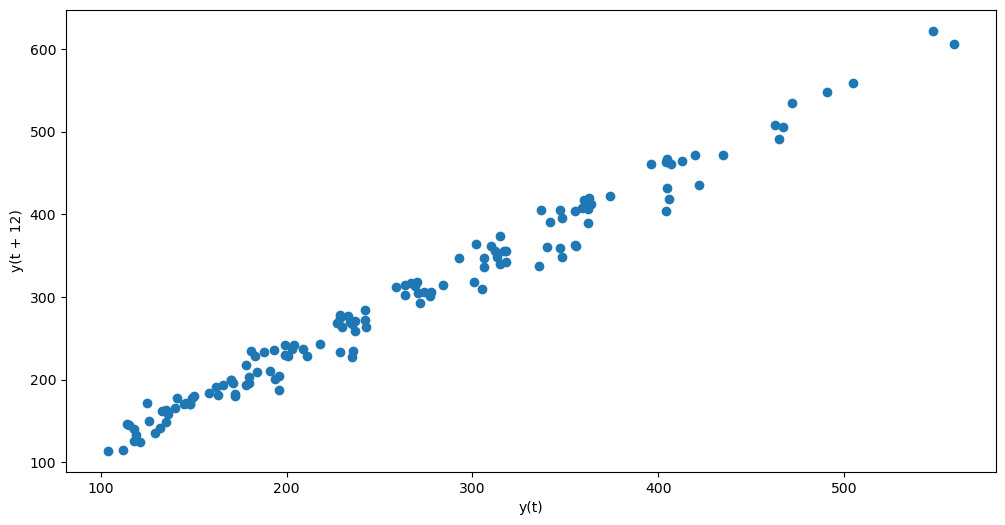

In [166]:
lag_plot(airline["Thousands of Passengers"], lag=12)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

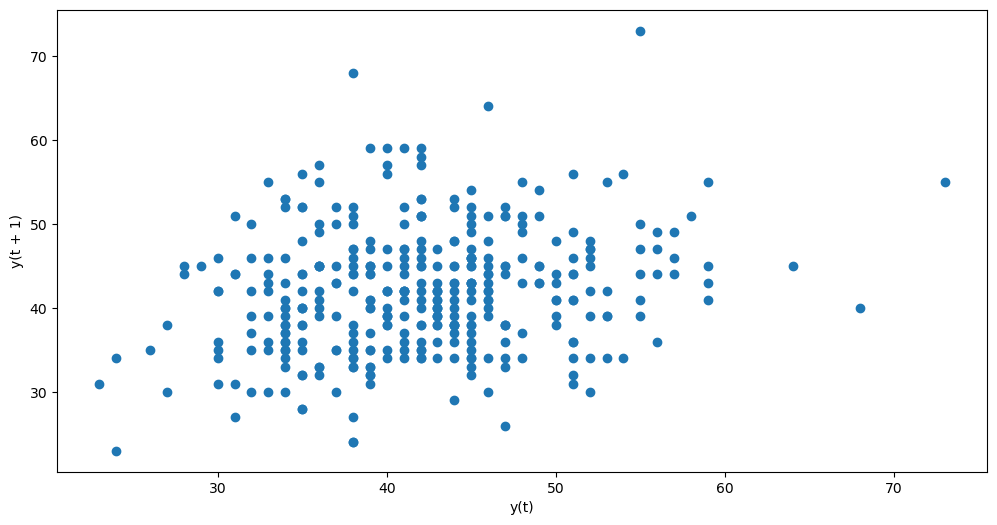

In [160]:
# 
lag_plot(df2)

In [168]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

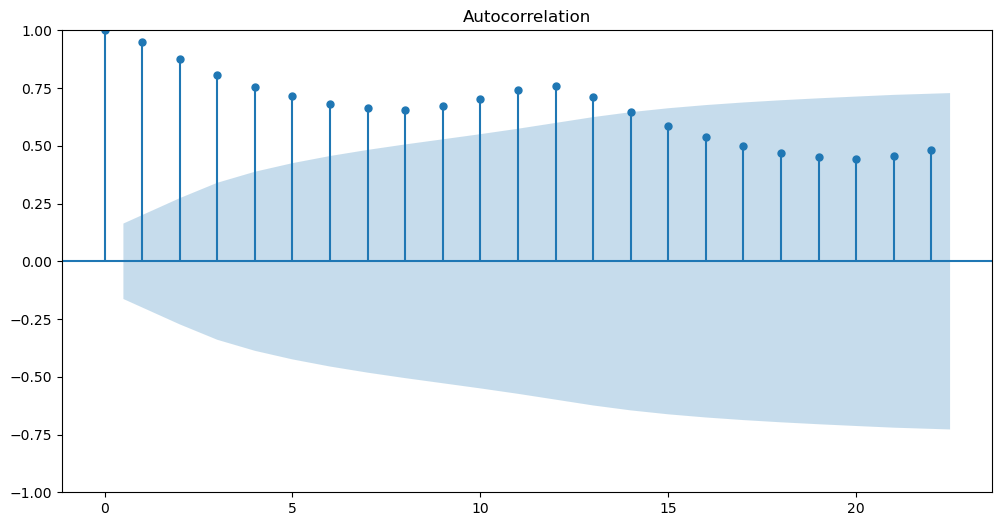

In [170]:
plot_acf(airline["Thousands of Passengers"]);

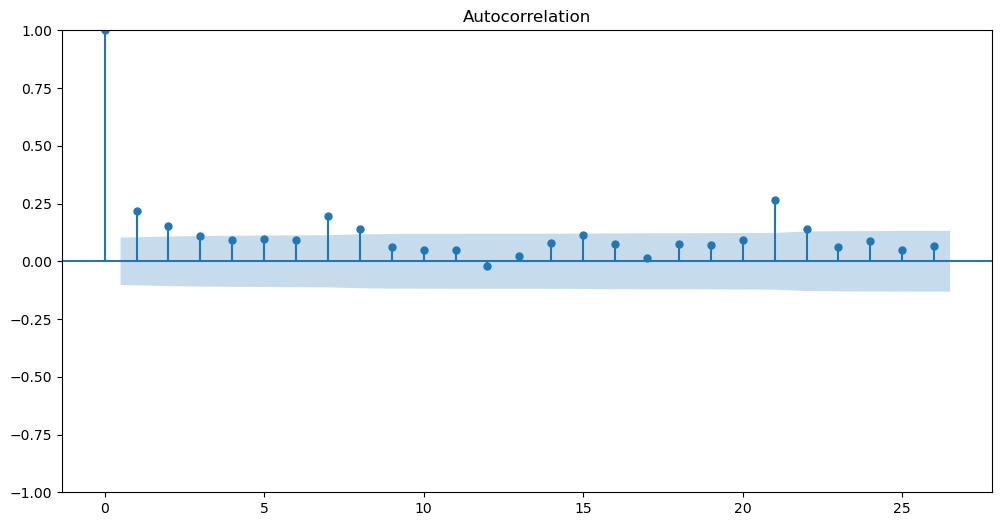

In [175]:
plot_acf(df2);

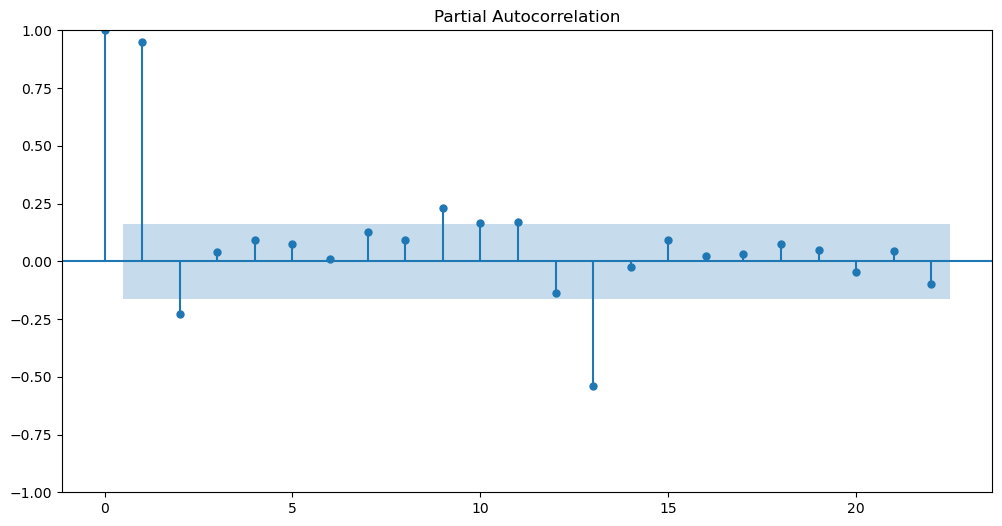

In [174]:
plot_pacf(airline["Thousands of Passengers"]);

# ARIMA

In [274]:
from statsmodels.tsa.ar_model import AutoReg, AutoRegResults, ar_select_order

In [193]:
df = pd.read_csv("Course Data/uspopulation.csv", index_col="DATE", parse_dates=True)
df.index.freq = "MS"

<Axes: xlabel='DATE'>

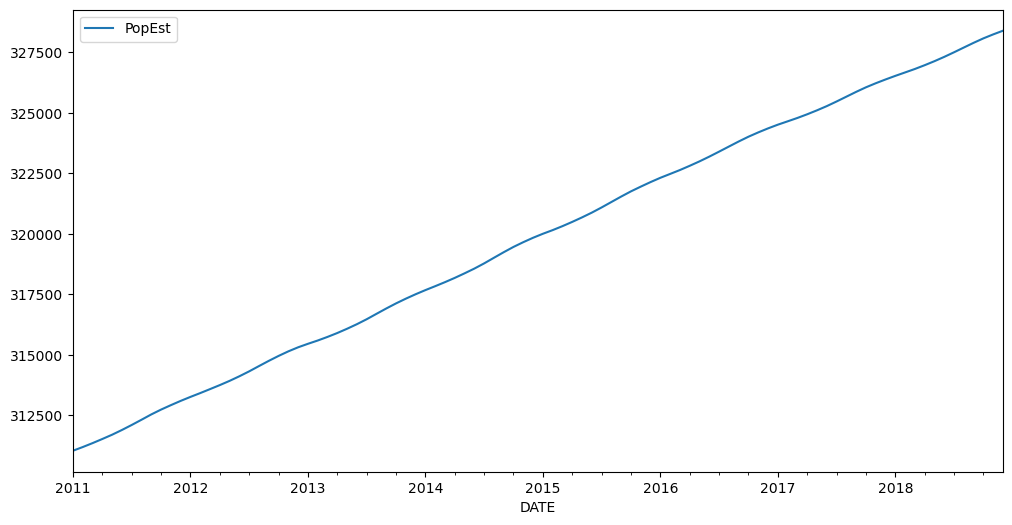

In [194]:
df.plot()

In [186]:
n = round(len(df) * .8)
train = df.iloc[:n]
test  = df.iloc[n:]

In [259]:
model = AutoReg(train["PopEst"], lags=1)

In [260]:
AR1_fit = model.fit()

In [261]:
AR1_fit.params

const        273.482203
PopEst.L1      0.999722
dtype: float64

In [265]:
start = len(train)
end   = len(train) + len(test) -1
print(start, "to", end)

77 to 95


In [278]:
AR1_values = AR1_fit.predict(start=start, end=end).rename("AR(1) Predictions")
ARn_values = AutoReg(train["PopEst"], lags=8).fit().predict(start=start, end=end).rename("AR(8) Predictions")

<Axes: xlabel='DATE'>

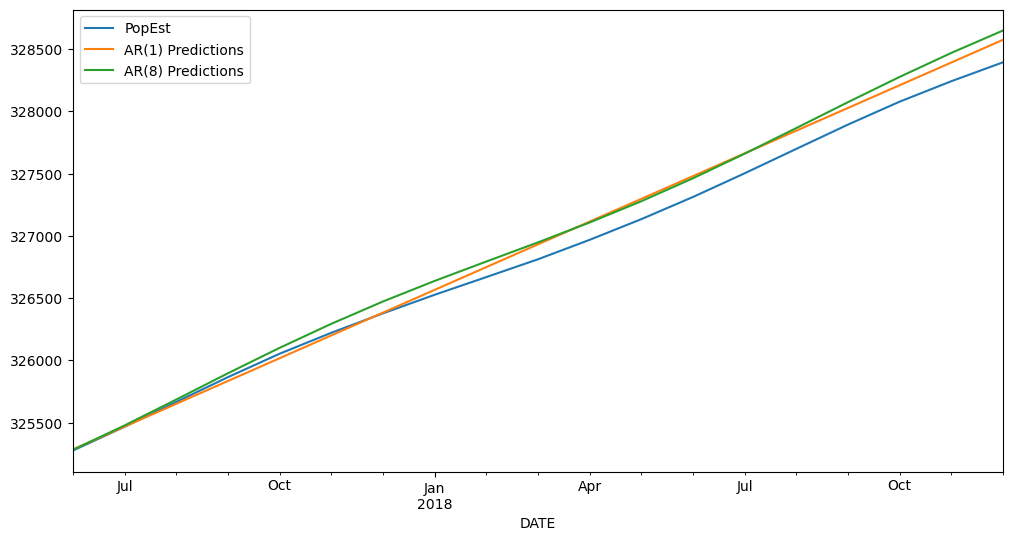

In [279]:
test.plot(legend=True)
AR1_values.plot(legend=True)
ARn_values.plot(legend=True)

In [281]:
error = mean_squared_error(test["PopEst"], ARn_values)
print(f"Error: {np.sqrt(error)}")

Error: 139.2243822890864


In [289]:
# FORECASTING
model = AutoReg(df["PopEst"], lags=8)
ARfit = model.fit()

forecasted_values = ARfit.predict(start=len(df), end=len(df)+12)

<Axes: xlabel='DATE'>

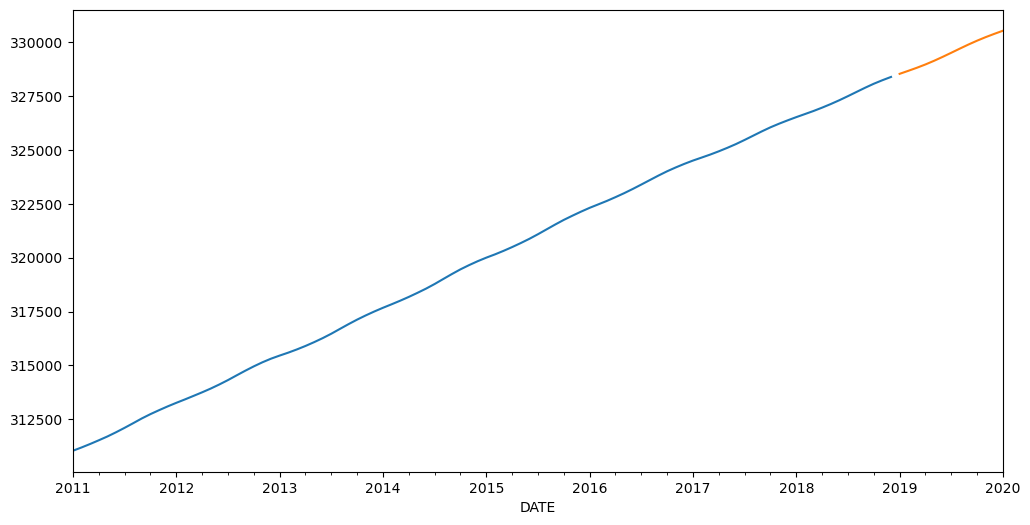

In [290]:
df["PopEst"].plot()
forecasted_values.plot()

# Descriptive Statistics

In [291]:
import pandas as pd
import numpy as np
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv('Course Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('Course Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

<Axes: xlabel='Month'>

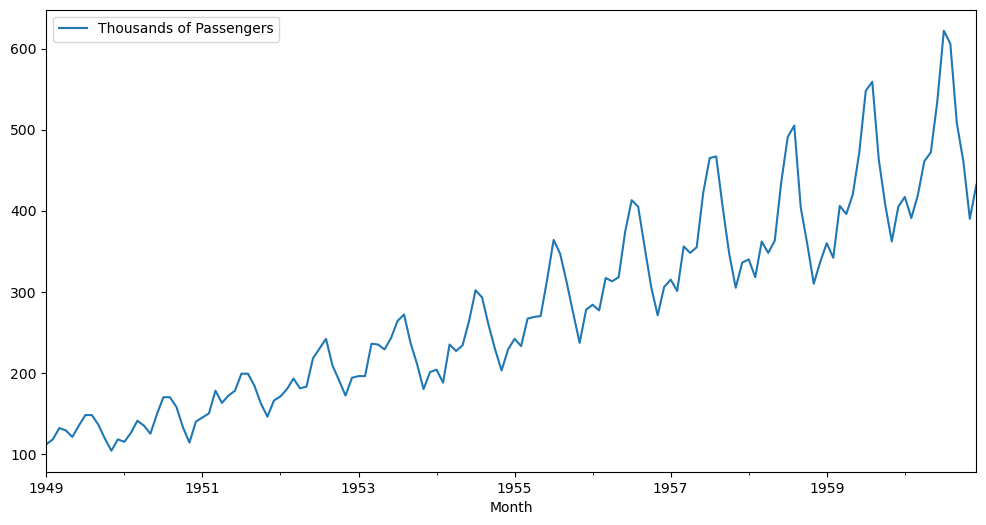

In [292]:
df1.plot()

In [299]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [300]:
adf_test(df1["Thousands of Passengers"])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [301]:
adf_test(df2["Births"])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [302]:
df3 = pd.read_csv("Course Data/samples.csv", index_col=0, parse_dates=True)
df3.index.freq = "MS"

<Axes: >

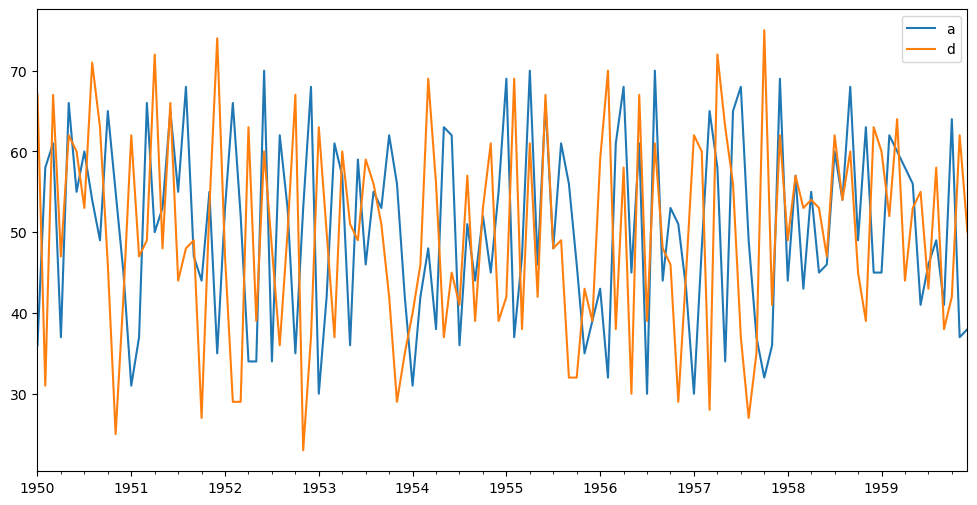

In [304]:
df3[["a", "d"]].plot()

<Axes: >

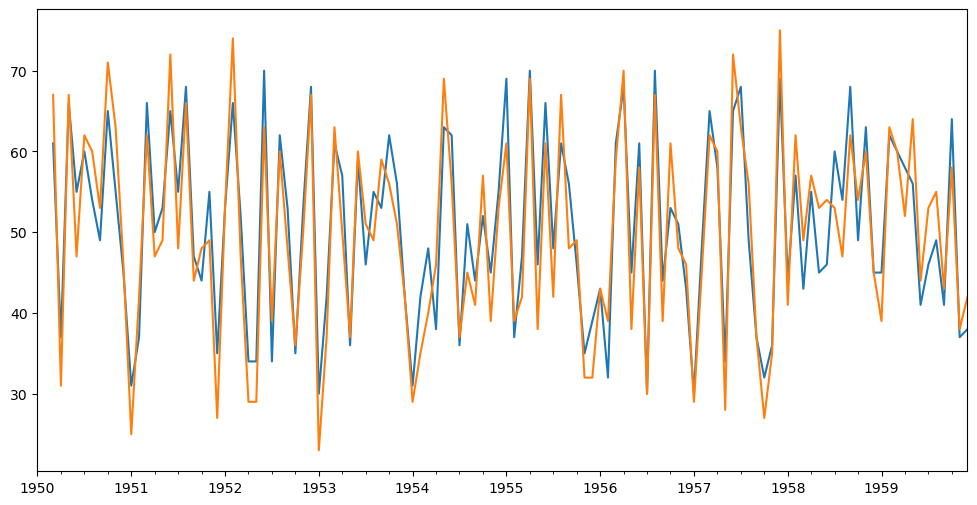

In [305]:
df3.a.iloc[2:].plot()
df3.d.shift(2).plot()

In [306]:
# Causality Test

from statsmodels.tsa.stattools import grangercausalitytestsc

In [307]:
grangercausalitytests(df3[["a", "d"]], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [310]:
grangercausalitytests(df3[["b", "d"]], maxlag=10);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7084  , p=0.5879  

<Axes: xlabel='Month'>

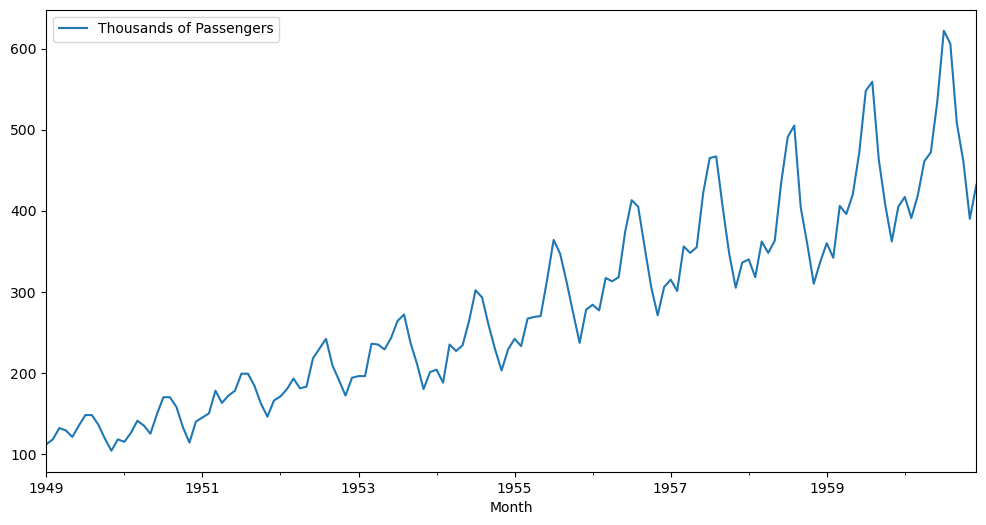

In [313]:
# airline

df1.plot()

In [315]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

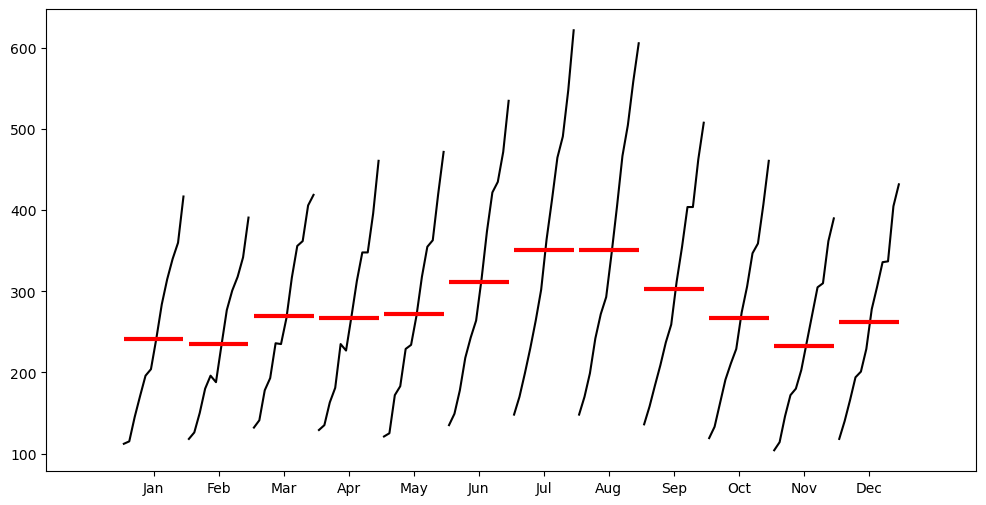

In [317]:
month_plot(df1["Thousands of Passengers"]);

## Choosing ARIMA orders

In [322]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.7 MB/s eta 0:00:0000:0100:01


In [323]:
from pmdarima import auto_arima

In [332]:
stepwise_fit = auto_arima(df2["Births"], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.056, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [333]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Fri, 02 Feb 2024   AIC                           2459.074
Time:                        23:05:05   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [334]:
stepwise_fit = auto_arima(df1["Thousands of Passengers"], 
                          start_p=0, start_q=0,
                          max_p=4,   max_q=4,
                          seasonal   =True,
                          trace      =True,
                          m          =12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.47 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.33 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.51 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [335]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 02 Feb 2024   AIC                           1019.178
Time:                                     23:08:40   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Using ARMA and ARIMA

In [365]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [337]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [338]:
from pmdarima import auto_arima

In [340]:
df1 = pd.read_csv("Course Data/DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
df1.index.freq = "D"
df1 = df1[:120]

In [341]:
df2 = pd.read_csv("Course Data/TradeInventories.csv", index_col="Date", parse_dates=True)
df2.index.freq="MS"

### ARMA

<Axes: xlabel='Date'>

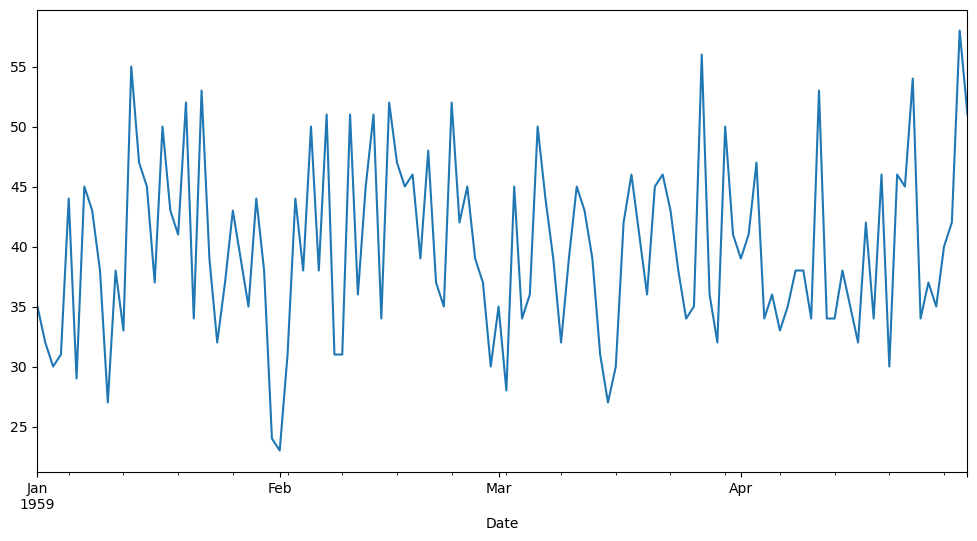

In [342]:
df1["Births"].plot()

In [343]:
adf_test(df1["Births"])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [348]:
auto_arima(df1["Births"], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 02 Feb 2024   AIC                            823.489
Time:                        23:18:51   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [366]:
train = df1.iloc[:90]
test  = df1.iloc[90:]

In [367]:
model = ARIMA(train["Births"])
results = model.fit()

In [368]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                          ARIMA   Log Likelihood                -308.379
Date:                Fri, 02 Feb 2024   AIC                            620.759
Time:                        23:27:26   BIC                            625.759
Sample:                    01-01-1959   HQIC                           622.775
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7667      0.786     50.609      0.000      38.227      41.307
sigma2        55.4236     10.155      5.458      0.000      35.520      75.327
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.41   Prob(JB):                         0.42
Heteroskedasticity (H):               0.90   Skew:                             0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [369]:
predictions = results.forecast(len(test))

<Axes: xlabel='Date'>

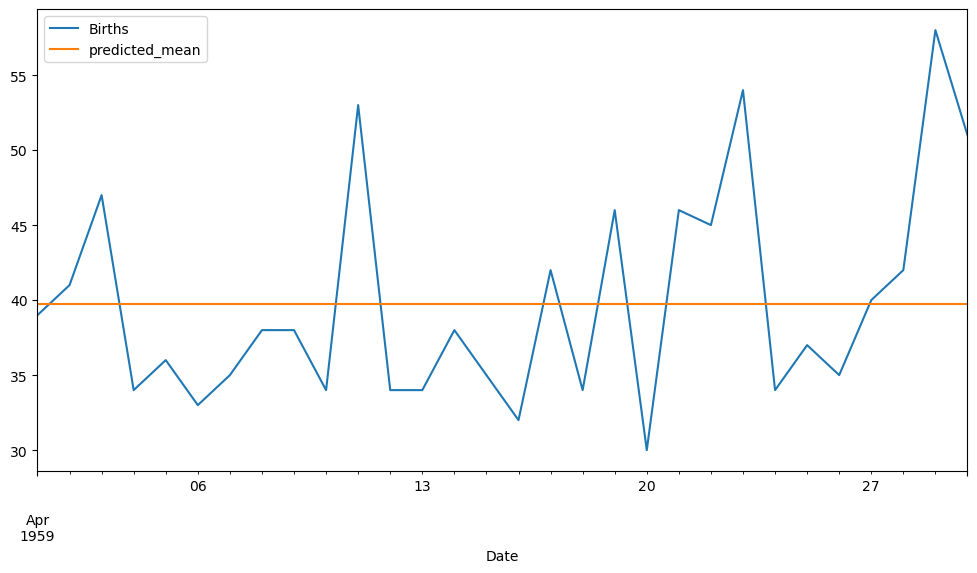

In [370]:
test["Births"].plot(legend=True)
predictions.plot(legend=True)

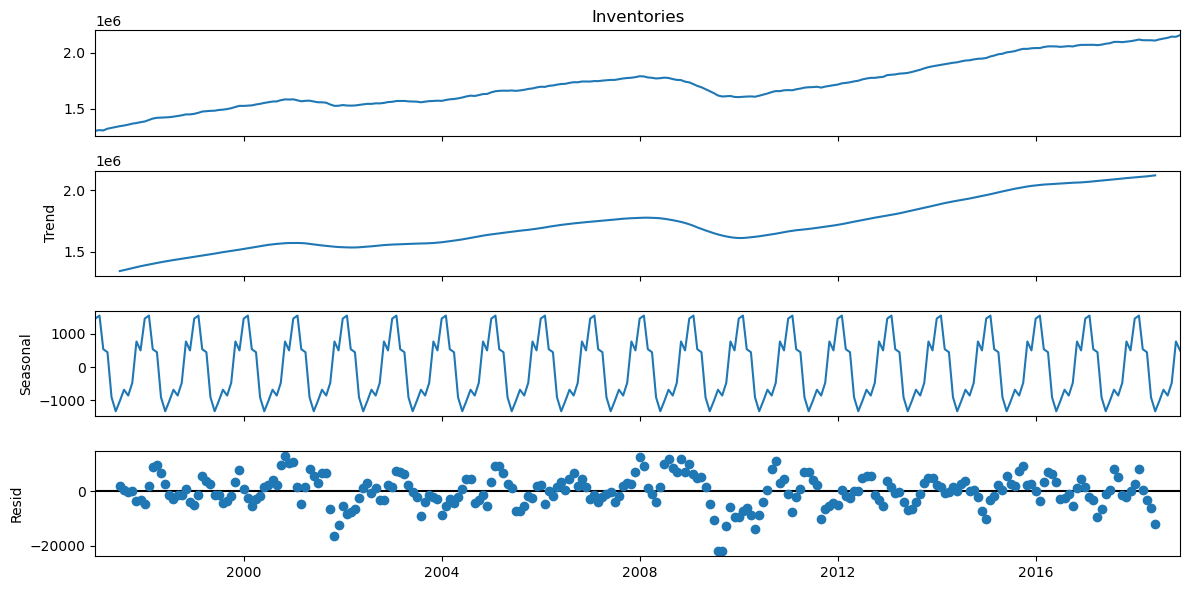

In [373]:
seasonal_decompose(df2["Inventories"], model="additive").plot();

In [383]:
auto_arima(df2["Inventories"], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 02 Feb 2024   AIC                           5348.037
Time:                        23:36:55   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [378]:
from statsmodels.tsa.statespace.tools import diff

In [379]:
df2["Diff_1"] = diff(df2["Inventories"], k_diff=1)

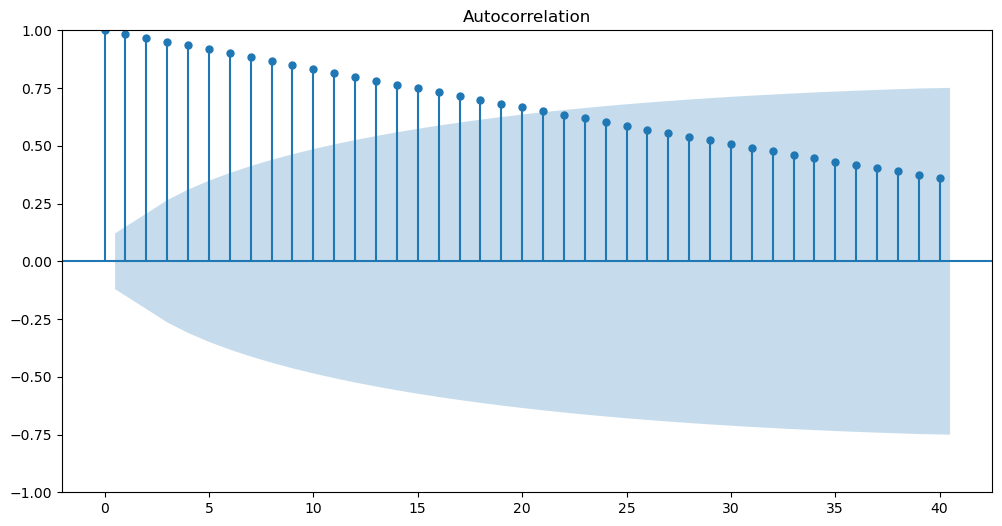

In [381]:
plot_acf(df2["Inventories"], lags=40);

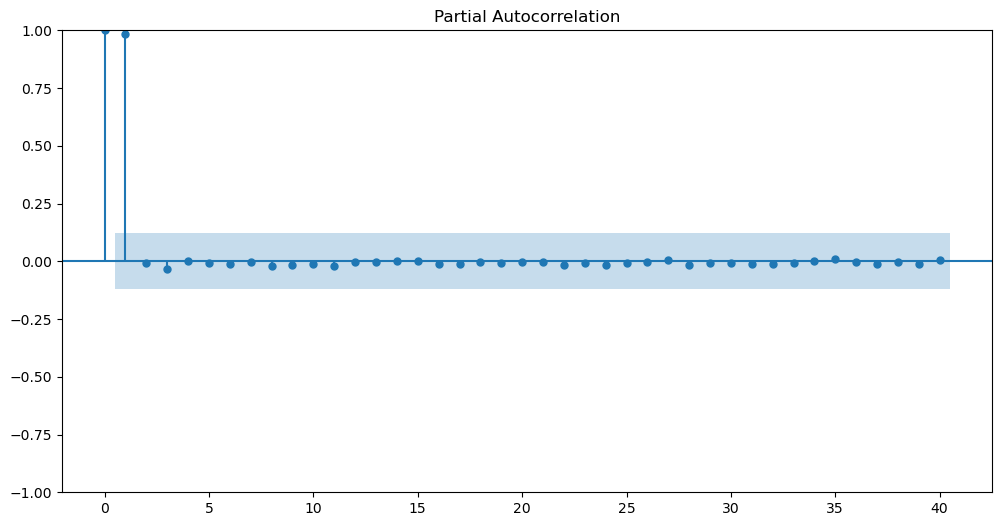

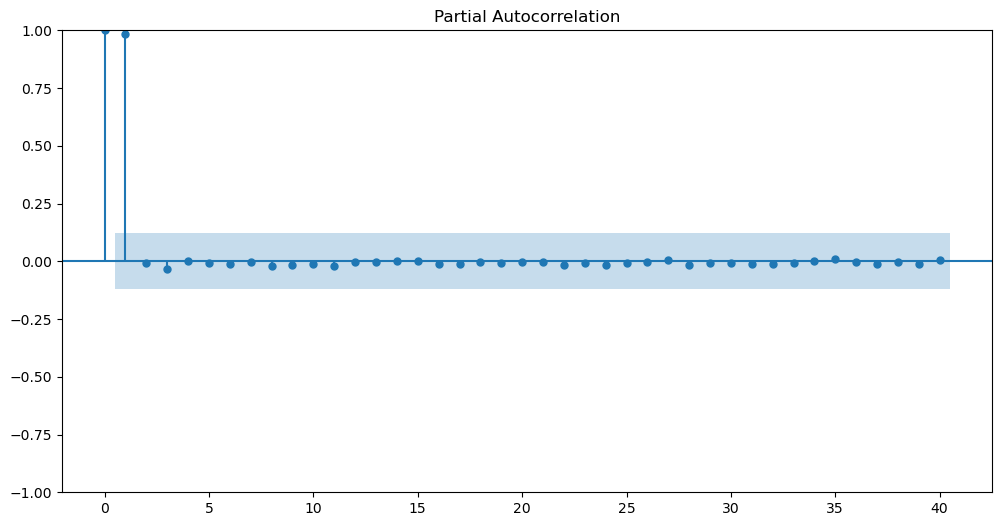

In [382]:
plot_pacf(df2["Inventories"], lags=40)

In [395]:
model = ARIMA(df2["Inventories"], order=(1, 1, 1)).fit()
# Take a look at notebook for detail for typ="levels"

In [396]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [398]:
df = pd.read_csv("Course Data/co2_mm_mlo.csv")
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [401]:
df["date"] = pd.to_datetime({"year": df["year"], "month": df["month"], "day": 1})
df = df.set_index("date")
df.index.freq = "MS"

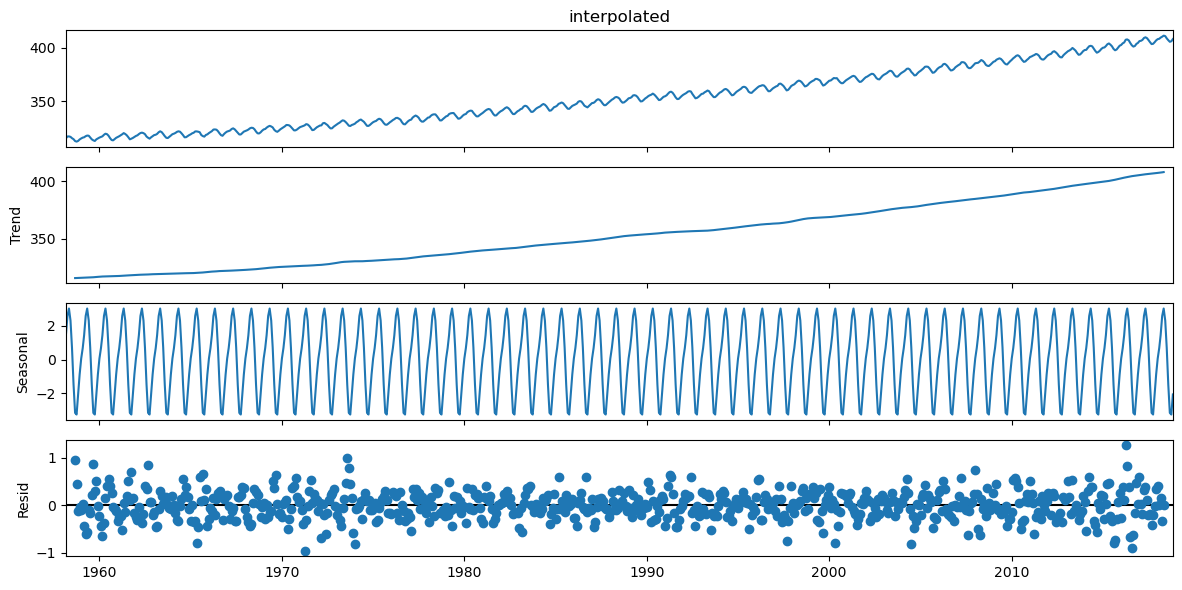

In [407]:
seasonal_decompose(df.interpolated, model="add").plot();

In [408]:
auto_arima(df.interpolated, seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.686
Date:                              Sat, 03 Feb 2024   AIC                            423.371
Time:                                      00:02:55   BIC                            450.913
Sample:                                  03-01-1958   HQIC                           433.998
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3564      0.035    -10.106      0.000      -0.425      -0.287
ma.L2         -0.0222      0.035     -0.640      0.522      -0.090       0.046
ma.L3         -0.0856      0.027     -3.161      0.002      -0.139      -0.033
ar.S.L12       0.9996      0.000   3060.520      0.000       0.999       1.000
ma.S.L12      -0.8670      0.021    -40.929      0.000      -0.909      -0.826
sigma2         0.0955      0.005     20.528      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.07
Prob(Q):                              0.79   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [409]:
train = df.iloc[:717]
test  = df.iloc[717:]

In [411]:
model = SARIMAX(train["interpolated"], order=(0, 1, 3), seasonal_order=(1, 0, 1, 12)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17036D+00    |proj g|=  7.04673D-01


 This problem is unconstrained.



At iterate    5    f=  3.17640D-01    |proj g|=  4.51864D-01

At iterate   10    f=  2.89552D-01    |proj g|=  1.79212D-03

At iterate   15    f=  2.89346D-01    |proj g|=  1.18000D-02

At iterate   20    f=  2.84198D-01    |proj g|=  4.04122D-02

At iterate   25    f=  2.80649D-01    |proj g|=  5.77809D-03

At iterate   30    f=  2.80600D-01    |proj g|=  1.16702D-03
  ys=-1.816E-07  -gs= 8.889E-08 BFGS update SKIPPED

At iterate   35    f=  2.80599D-01    |proj g|=  1.19200D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     58      1     1     0   1.192D-03   2.806D-01
  F =  0.28059910360277740     

In [412]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.190
Date:                              Sat, 03 Feb 2024   AIC                            414.379
Time:                                      00:13:41   BIC                            441.821
Sample:                                  03-01-1958   HQIC                           424.976
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3545      0.036     -9.934      0.000      -0.424      -0.285
ma.L2         -0.0245      0.031     -0.793      0.428      -0.085       0.036
ma.L3         -0.0872      0.035     -2.511      0.012      -0.155      -0.019
ar.S.L12       0.9996      0.000   2993.263      0.000       0.999       1.000
ma.S.L12      -0.8657      0.022    -38.577      0.000      -0.910      -0.822
sigma2         0.0951      0.005     20.288      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.33
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [413]:
start = len(train)
end = len(train) + len(test) - 1

In [414]:
predictions = model.predict(start, end, typ="levels").rename("SARIMA")

<Axes: xlabel='date'>

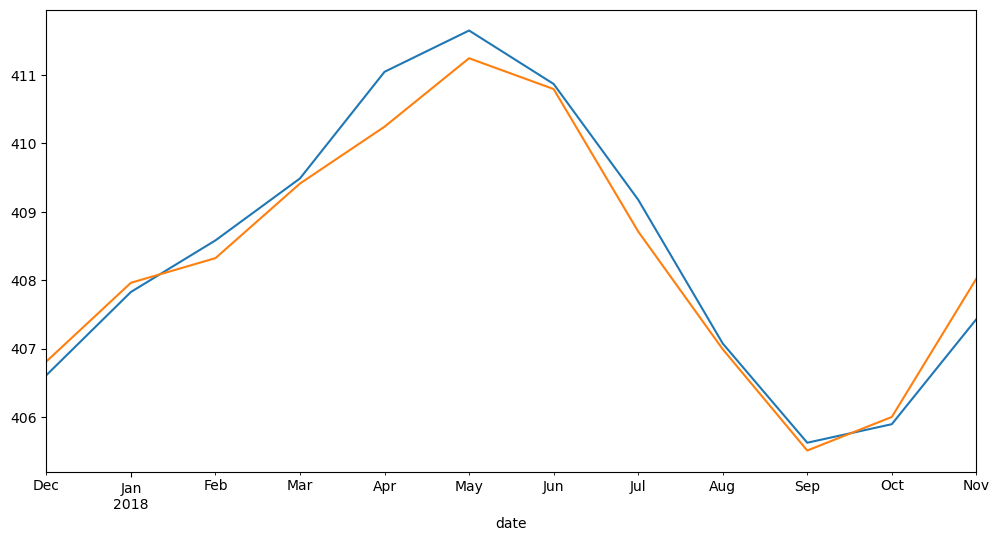

In [416]:
predictions.plot()
test.interpolated.plot()